<!--NAVIGATION-->
< [List Comprehensions](11-List-Comprehensions.ipynb) | [Contents](Index.ipynb) | [Modules and Packages](13-Modules-and-Packages.ipynb) >

# Generators

Here we'll take a deeper dive into Python generators, including *generator expressions* and *generator functions*.

## Generator Expressions

The difference between list comprehensions and generator expressions is sometimes confusing; here we'll quickly outline the differences between them:

### List comprehensions use square brackets, while generator expressions use parentheses
This is a representative list comprehension:

In [1]:
[n ** 2 for n in range(12)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

While this is a representative generator expression:

In [2]:
(n ** 2 for n in range(12))

<generator object <genexpr> at 0x7f7efc3557c8>

Notice that printing the generator expression does not print the contents; one way to print the contents of a generator expression is to pass it to the ``list`` constructor:

In [3]:
G = (n ** 2 for n in range(12))
list(G)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

### A list is a collection of values, while a generator is a recipe for producing values
When you create a list, you are actually building a collection of values, and there is some memory cost associated with that.
When you create a generator, you are not building a collection of values, but a recipe for producing those values.
Both expose the same iterator interface, as we can see here:

In [4]:
L = [n ** 2 for n in range(12)]
for val in L:
    print(val, end=' ')

0 1 4 9 16 25 36 49 64 81 100 121 

In [5]:
G = (n ** 2 for n in range(12))
for val in G:
    print(val, end=' ')

0 1 4 9 16 25 36 49 64 81 100 121 

The difference is that a generator expression does not actually compute the values until they are needed.
This not only leads to memory efficiency, but to computational efficiency as well!
This also means that while the size of a list is limited by available memory, the size of a generator expression is unlimited!

An example of an infinite generator expression can be created using the ``count`` iterator defined in ``itertools``:

In [6]:
from itertools import count
count()

count(0)

In [7]:
for i in count():
    print(i, end=' ')
    if i >= 10: break

0 1 2 3 4 5 6 7 8 9 10 

The ``count`` iterator will go on happily counting forever until you tell it to stop; this makes it convenient to create generators that will also go on forever:

In [8]:
factors = [2, 3, 5, 7]
G = (i for i in count() if all(i % n > 0 for n in factors))
for val in G:
    print(val, end=' ')
    if val > 40: break

1 11 13 17 19 23 29 31 37 41 

You might see what we're getting at here: if we were to expand the list of factors appropriately, what we would have the beginnings of is a prime number generator, using the Sieve of Eratosthenes algorithm. We'll explore this more momentarily.

### A list can be iterated multiple times; a generator expression is single-use
This is one of those potential gotchas of generator expressions.
With a list, we can straightforwardly do this:

In [9]:
L = [n ** 2 for n in range(12)]
for val in L:
    print(val, end=' ')
print()

for val in L:
    print(val, end=' ')

0 1 4 9 16 25 36 49 64 81 100 121 
0 1 4 9 16 25 36 49 64 81 100 121 

A generator expression, on the other hand, is used-up after one iteration:

In [10]:
G = (n ** 2 for n in range(12))
list(G)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

In [11]:
list(G)

[]

This can be very useful because it means iteration can be stopped and started:

In [12]:
G = (n**2 for n in range(12))
for n in G:
    print(n, end=' ')
    if n > 30: break

print("\ndoing something in between")

for n in G:
    print(n, end=' ')

0 1 4 9 16 25 36 
doing something in between
49 64 81 100 121 

One place I've found this useful is when working with collections of data files on disk; it means that you can quite easily analyze them in batches, letting the generator keep track of which ones you have yet to see.

## Generator Functions: Using ``yield``
We saw in the previous section that list comprehensions are best used to create relatively simple lists, while using a normal ``for`` loop can be better in more complicated situations.
The same is true of generator expressions: we can make more complicated generators using *generator functions*, which make use of the ``yield`` statement.

Here we have two ways of constructing the same list:

In [ ]:
L1 = [n ** 2 for n in range(12)]

L2 = []
for n in range(12):
    L2.append(n ** 2)

print(L1)
print(L2)

Similarly, here we have two ways of constructing equivalent generators:

In [ ]:
G1 = (n ** 2 for n in range(12))

def gen():
    for n in range(12):
        yield n ** 2

G2 = gen()
print(*G1)
print(*G2)

A generator function is a function that, rather than using ``return`` to return a value once, uses ``yield`` to yield a (potentially infinite) sequence of values.
Just as in generator expressions, the state of the generator is preserved between partial iterations, but if we want a fresh copy of the generator we can simply call the function again.

## Example: Prime Number Generator
Here I'll show my favorite example of a generator function: a function to generate an unbounded series of prime numbers.
A classic algorithm for this is the *Sieve of Eratosthenes*, which works something like this:

In [ ]:
# Generate a list of candidates
L = [n for n in range(2, 40)]
print(L)

In [ ]:
# Remove all multiples of the first value
L = [n for n in L if n == L[0] or n % L[0] > 0]
print(L)

In [ ]:
# Remove all multiples of the second value
L = [n for n in L if n == L[1] or n % L[1] > 0]
print(L)

In [ ]:
# Remove all multiples of the third value
L = [n for n in L if n == L[2] or n % L[2] > 0]
print(L)

If we repeat this procedure enough times on a large enough list, we can generate as many primes as we wish.

Let's encapsulate this logic in a generator function:

In [1]:
def gen_primes(N):
    """Generate primes up to N"""
    primes = set()
    for n in range(2, N):
        if all(n % p > 0 for p in primes):
            primes.add(n)
            yield n

print(*gen_primes(100))

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97


In [3]:
# we will be using gapminder_full file  -> https://raw.githubusercontent.com/syntagmatic/gapminder-csv/master/gapminder.csv

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("C:\\demogit\\gapminder_full.csv", error_bad_lines=False, encoding="ISO-8859-1")
print(dataframe.head())
print(dataframe.isnull().values.any())


       country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106
False


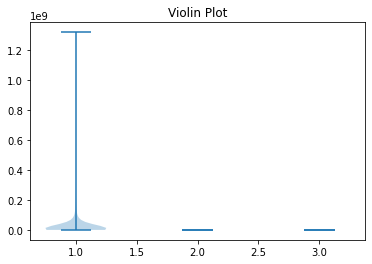

In [4]:
# Plotting a violinplot using matplotlib

population = dataframe.population
life_exp = dataframe.life_exp
gdp_cap = dataframe.gdp_cap

# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot([population, life_exp, gdp_cap])

# Add title
ax.set_title('Violin Plot')
plt.show()

In [5]:
dataframe = dataframe.groupby("country").last()
dataframe = dataframe.sort_values(by=["population"], ascending=False)
dataframe = dataframe.iloc[10:]
print(dataframe)

                       year  population continent  life_exp       gdp_cap
country                                                                  
Philippines            2007    91077287      Asia    71.688   3190.481016
Vietnam                2007    85262356      Asia    74.249   2441.576404
Germany                2007    82400996    Europe    79.406  32170.374420
Egypt                  2007    80264543    Africa    71.338   5581.180998
Ethiopia               2007    76511887    Africa    52.947    690.805576
...                     ...         ...       ...       ...           ...
Montenegro             2007      684736    Europe    74.543   9253.896111
Equatorial Guinea      2007      551201    Africa    51.579  12154.089750
Djibouti               2007      496374    Africa    54.791   2082.481567
Iceland                2007      301931    Europe    81.757  36180.789190
Sao Tome and Principe  2007      199579    Africa    65.528   1598.435089

[132 rows x 5 columns]


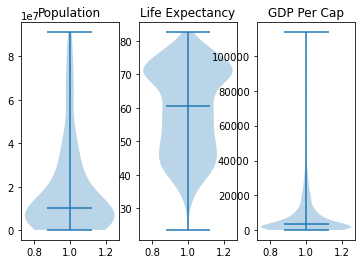

In [6]:
# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(dataframe.population, showmedians=True)
ax1.set_title('Population')

# Plot violin plot on axes 2
ax2.violinplot(life_exp, showmedians=True)
ax2.set_title('Life Expectancy')

# Plot violin plot on axes 3
ax3.violinplot(gdp_cap, showmedians=True)
ax3.set_title('GDP Per Cap')

plt.show()

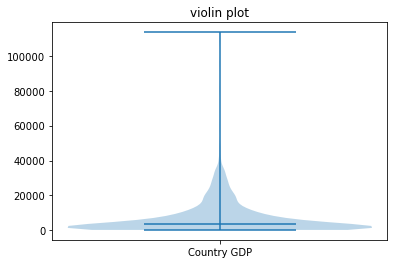

In [7]:
fig, ax = plt.subplots()
ax.violinplot(gdp_cap, showmedians=True)
ax.set_title('violin plot')
ax.set_xticks([1])
ax.set_xticklabels(["Country GDP",])
plt.show()

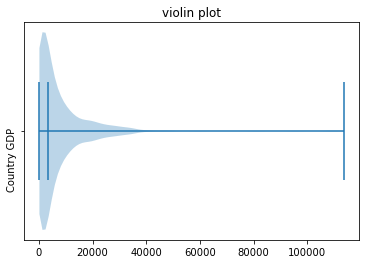

In [8]:
fig, ax = plt.subplots()
ax.violinplot(gdp_cap, showmedians=True, vert=False)
ax.set_title('violin plot')
ax.set_yticks([1])
ax.set_yticklabels(["Country GDP",])
ax.tick_params(axis='y', labelrotation = 90)
plt.show()

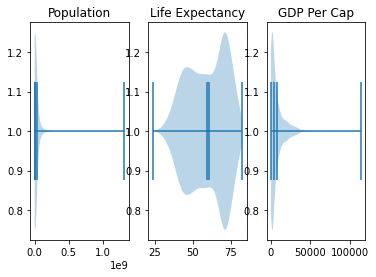

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
ax1.violinplot(population, showmedians=True, showmeans=True, vert=False)
ax1.set_title('Population')

ax2.violinplot(life_exp, showmedians=True, showmeans=True, vert=False)
ax2.set_title('Life Expectancy')

ax3.violinplot(gdp_cap, showmedians=True, showmeans=True, vert=False)
ax3.set_title('GDP Per Cap')
plt.show()

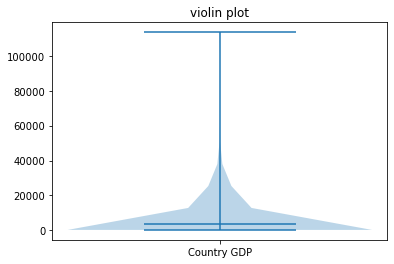

In [10]:
fig, ax = plt.subplots()
ax.violinplot(gdp_cap, showmedians=True, points=10)
ax.set_title('violin plot')
ax.set_xticks([1])
ax.set_xticklabels(["Country GDP",])
plt.show()

<Figure size 720x432 with 0 Axes>

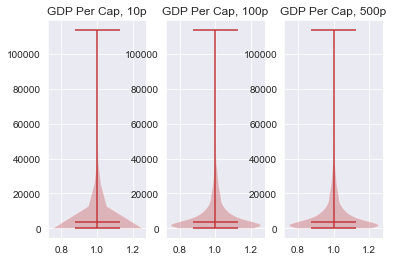

In [23]:



fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
ax1.violinplot(gdp_cap, showmedians=True, points=10)
ax1.set_title('GDP Per Cap, 10p')

ax2.violinplot(gdp_cap, showmedians=True, points=100)
ax2.set_title('GDP Per Cap, 100p')

ax3.violinplot(gdp_cap, showmedians=True, points=500)
ax3.set_title('GDP Per Cap, 500p')
plt.show()

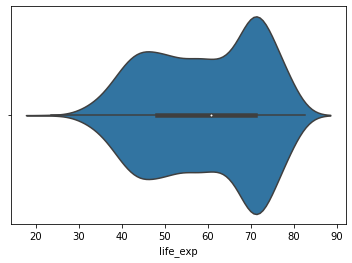

In [12]:
import seaborn as sns
sns.violinplot(x=life_exp)

plt.show()

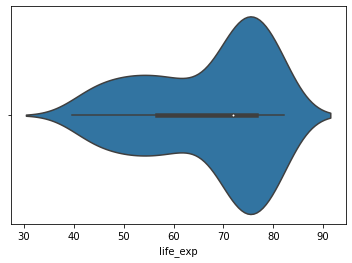

In [13]:
sns.violinplot(x="life_exp", data = dataframe)

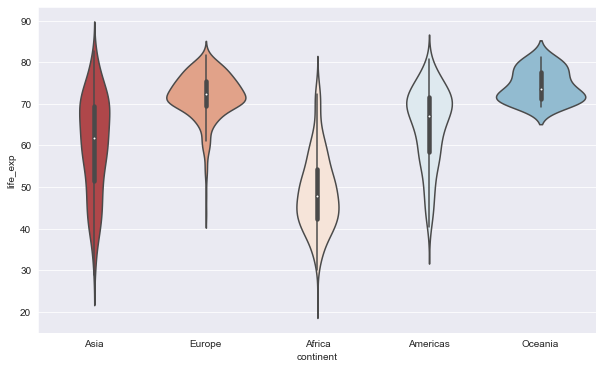

In [22]:
dataframe = pd.read_csv("C:\\demogit\\gapminder_full.csv", error_bad_lines=False, encoding="ISO-8859-1")

plt.figure(figsize=(10,6))

country = dataframe.country
continent = dataframe.continent
population = dataframe.population
life_exp = dataframe.life_exp
gdp_cap = dataframe.gdp_cap

sns.violinplot(x=continent, y=life_exp, data=dataframe)

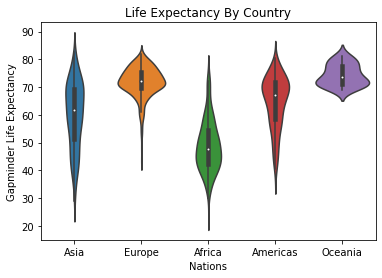

In [17]:
plt.figure(figsize=(10,6))

ax = sns.violinplot(x=continent, y=life_exp)
ax.set_title("Life Expectancy By Country")
ax.set_ylabel("Gapminder Life Expectancy")
ax.set_xlabel("Nations")

plt.show()

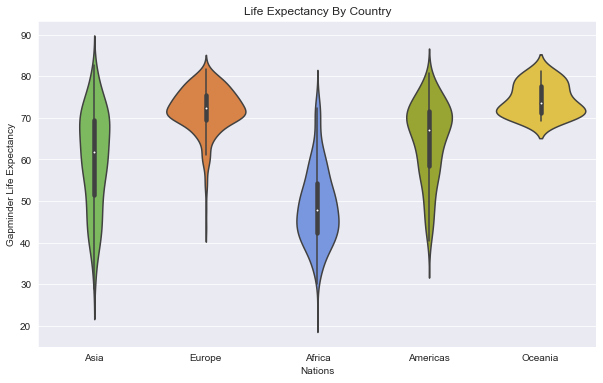

In [21]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
plt.figure(figsize=(10,6))
ax = sns.violinplot(x=continent, y=life_exp, palette=colors_list)
ax.set_title("Life Expectancy By Country")
ax.set_ylabel("Gapminder Life Expectancy")
ax.set_xlabel("Nations")

plt.show()

C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


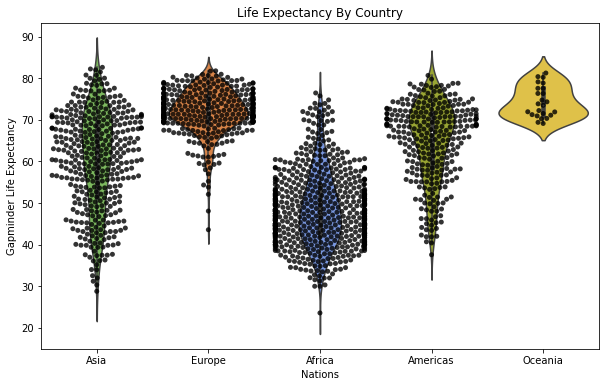

In [19]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']

plt.figure(figsize=(10,6))
sns.violinplot(x=continent, y=life_exp,palette=colors_list)
sns.swarmplot(x=continent, y=life_exp, color="k", alpha=0.8)
plt.title("Life Expectancy By Country")
plt.ylabel("Gapminder Life Expectancy")
plt.xlabel("Nations")

plt.show()

C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sarawal\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


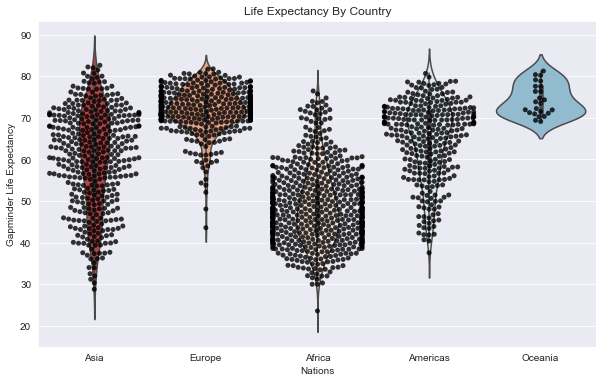

In [20]:
plt.figure(figsize=(10,6))
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.violinplot(x=continent, y=life_exp, data=dataframe)
sns.swarmplot(x=continent, y=life_exp, data=dataframe, color="k", alpha=0.8)
plt.title("Life Expectancy By Country")
plt.ylabel("Gapminder Life Expectancy")
plt.xlabel("Nations")

plt.show()

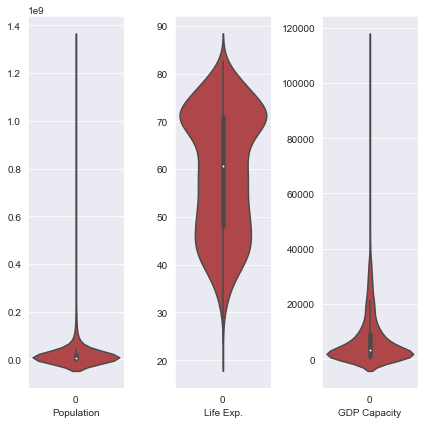

In [29]:

fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])

sns.violinplot(data=population)
ax.set_xlabel("Population")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=life_exp)
ax.set_xlabel("Life Exp.")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=gdp_cap)
ax.set_xlabel("GDP Capacity")

fig.tight_layout()
plt.show()

In [30]:
# Separate European countries from the original dataset
europe = dataframe.loc[dataframe["continent"] == "Europe"]

# Calculate mean of the `life_exp` variable
avg_life_exp = dataframe["life_exp"].mean()

# Declare an empty list
above_average_life_exp = []

# Iterate through the rows in the dataset, assigning Yes/No
# Depending on the value of the variable in the iterated row
for index, row in europe.iterrows():
	if row["life_exp"] > avg_life_exp:
		above_average_life_exp.append("Yes")
	else:
		above_average_life_exp.append("No")

# Add new column to dataset
europe["above_average_life_exp"] = above_average_life_exp

ipykernel_launcher:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
europe = europe.tail(50)

ax = sns.violinplot(x=europe.country, y=europe.life_exp, hue=europe.above_average_life_exp)
ax.set_title("Life Expectancy By Country")
ax.set_ylabel("Gapminder Life Expectancy")
ax.set_xlabel("Nations")

plt.show()